In [1]:
import glob
import sys
import warnings
warnings.filterwarnings('ignore')

import xarray as xr
import cmocean

sys.path.append('/g/data/xv83/quantile-mapping/qq-workflows')
import validation
sys.path.append('/g/data/xv83/quantile-mapping/qqscale')
import utils

In [26]:
def get_obs_files(obs, var):
    """Get obs data"""

    if obs == 'BARRA-R2':
        target_files = sorted(glob.glob(f"/g/data/ob53/BARRA2/output/reanalysis/AUS-11/BOM/ERA5/historical/hres/BARRA-R2/v1/day/{var}/latest/*.nc"))

    return target_files
    
    
def get_model_files(model, var):
    """Get model data"""
    
    if model == "ACCESS-CM2":
        hist_files = sorted(glob.glob(f"/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r4i1p1f1/day/{var}/gn/latest/*.nc"))

    return hist_files

In [20]:
input_units = {
    'rsds': "W m-2",
}

output_units = {
    'rsds': "W m-2",
}

clim_cbar = {
    'rsds': cmocean.cm.solar
}

clim_levels = {
    'rsds': [115, 130, 145, 160, 175, 200, 225, 250, 275],
}

diff_cbar = {
    'rsds': 'RdBu_r'
}

diff_levels = {
    'rsds': [-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10],
}

In [28]:
def get_data(var, model, obs):
    """Plot the comparison"""

    hist_files = get_model_files(model, var)
    ds_hist = utils.read_data(
        hist_files,
        var,
        time_bounds=["1985", "2014"],
        input_units=input_units[var],
        output_units=output_units[var],
    )
    hist_clim = ds_hist[var].mean('time', keep_attrs=True).compute()

    target_files = get_obs_files(obs, var)
    ds_target = utils.read_data(
        target_files,
        var,
        time_bounds=["1985", "2014"],
        input_units=input_units[var],
        output_units=output_units[var],
    )
    try:
        ds_target = ds_target.drop_vars('crs')
    except ValueError:
        pass
    target_clim = ds_target[var].mean('time', keep_attrs=True).compute()
    
    target_hist_comparison = validation.spatial_comparison_data(
        target_clim,
        hist_clim,
        'multiplicative'
    )
    
    return hist_clim, target_clim, target_hist_comparison

In [29]:
hist_clim, target_clim, target_hist_comparison = get_data("rsds", "ACCESS-CM2", "BARRA-R2")

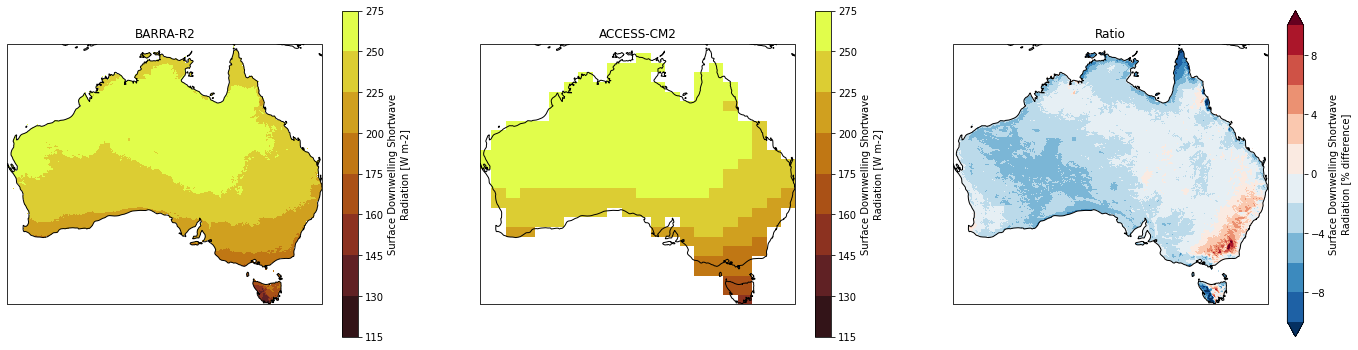

In [30]:
validation.spatial_comparison_plot(
    target_clim,
    hist_clim,
    target_hist_comparison,
    'BARRA-R2',
    'ACCESS-CM2',
    clim_cbar["rsds"],
    diff_cbar["rsds"],
    clim_levels["rsds"],
    diff_levels["rsds"],
    'multiplicative',
    land_only=True,
    clim_extend='neither',
)